In [12]:
# For data structure
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# For reading stock data from yahoo
#from pandas.io.data import DataReader
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

# For division, avoiding worry about float data for like python3
from __future__ import division

In [13]:
import pandas as pd
pd.__version__

u'0.18.0'

In [14]:
# Major index ETFs
etf_list = ['SPY','QQQ','IWM','DIA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)


# For loop for grabing yahoo finance data and setting as a dataframe
for stock in etf_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [15]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-06-29 to 2016-06-27
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


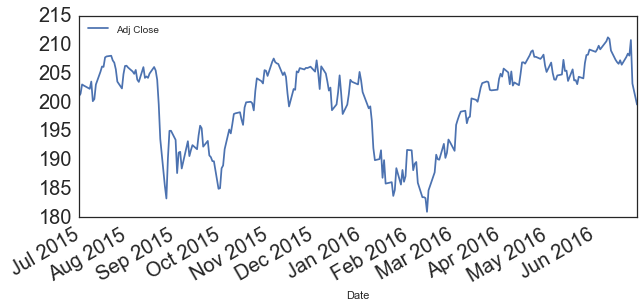

In [16]:
# Line plot for the closing price of SPY
SPY['Adj Close'].plot(legend=True,figsize=(10,4))

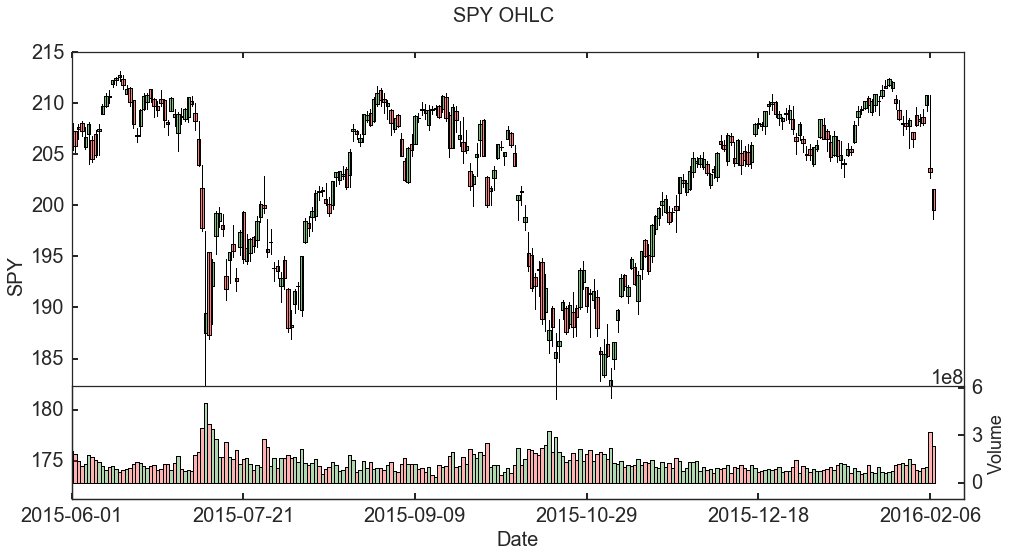

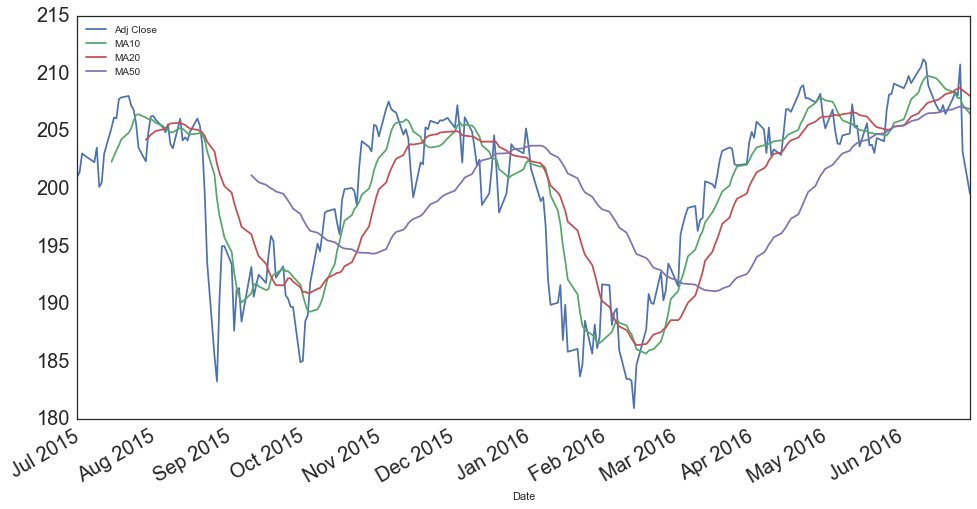

In [17]:
# OHLC plot for SPY

from matplotlib.finance import *
from matplotlib.dates import num2date
import matplotlib.ticker as mticker
from matplotlib.dates import date2num
import matplotlib

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)


# Create figure
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
# Plot the candlestick
spy_candle = candlestick2_ohlc(ax1, SPY['Open'], SPY['High'], SPY['Low'], SPY['Close'],   
                       width=1,colorup='g', colordown='r',alpha=0.5)

# shift y-limits of the candlestick plot so that there is space at the bottom for the volume bar chart
pad = 0.25
yl = ax1.get_ylim()
ax1.set_ylim(yl[0]-(yl[1]-yl[0])*pad,yl[1])

# Add a seconds axis for the volume overlay
ax2 = ax1.twinx()

# set the position of ax2 so that it is short (y2=0.32) but otherwise the same size as ax
ax2.set_position(matplotlib.transforms.Bbox([[0.125,0.125],[0.9,0.32]]))

# Plot the volume overlay
vol = volume_overlay(ax2, SPY['Open'], SPY['Close'], SPY['Volume'], colorup='g', colordown='r', 
                    alpha=0.3, width=1)
# ax2.add_collection(vol)

# the y-ticks for the bar were too dense, keep only every third one
yticks = ax2.get_yticks()
ax2.set_yticks(yticks[::3])

#scale the x-axis tight
ax2.set_xlim(min(SPY.index),max(SPY.index))


# format the x-ticks with a human-readable date. 
xt = ax1.get_xticks()
new_xticks = [datetime.date.isoformat(num2date(d)) for d in xt]
ax1.set_xticklabels(new_xticks,rotation='horizontal', horizontalalignment='center')

plt.suptitle('SPY OHLC', fontsize=20)
plt.margins(0.2)
ax1.set_xlabel('Date',fontsize=20)
ax1.set_ylabel('SPY', fontsize=20)
ax2.set_xlim(0,260)
ax2.set_ylabel('Volume', fontsize=18)
# ax2.set_ylim((1/2*min(SPY['Volume']),6*max(SPY['Volume'])))
ax1.tick_params(axis='both', which ='major',direction='in', length=6, width=2)
#ax1.tick_params(axis='both', which ='minor',direction='out', length=3, width=1)
ax2.tick_params(axis='both', which ='major',direction='in', length=6, width=2)
# plt.show()


# plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA%s" %(str(ma))
    SPY[column_name]=Series.rolling(SPY['Adj Close'],window=ma).mean()
    
SPY[['Adj Close','MA10','MA20','MA50']].plot(subplots=False,figsize=(16,8))

